In [ ]:
### Data Collection
import pandas_datareader as pdr
key="ffb2d9d5c7baa952c1444d7ebd6e0e850cd1ab98"

In [ ]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

/usr/local/lib/python3.7/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [ ]:
df.to_csv('AAPL.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Apple.csv')
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,OpenInt,Stock
0,0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0,AAPL
1,1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0,AAPL
2,2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0,AAPL
3,3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0,AAPL
4,4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0,AAPL


In [ ]:
df.tail()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,OpenInt,Stock
8359,8359,2017-11-06,171.75,174.36,171.10,173.63,34901241,0,AAPL
8360,8360,2017-11-07,173.29,174.51,173.29,174.18,24424877,0,AAPL
8361,8361,2017-11-08,174.03,175.61,173.71,175.61,24451166,0,AAPL
8362,8362,2017-11-09,174.48,175.46,172.52,175.25,29533086,0,AAPL
8363,8363,2017-11-10,175.11,175.38,174.27,174.67,25130494,0,AAPL


In [ ]:
df1=df.reset_index()['Close']
df1

0         0.42388
1         0.42134
2         0.42902
3         0.41618
4         0.43927
          ...    
8359    173.63000
8360    174.18000
8361    175.61000
8362    175.25000
8363    174.67000
Name: Close, Length: 8364, dtype: float64

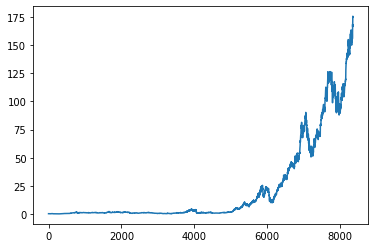

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 
import numpy as np
df1

0         0.42388
1         0.42134
2         0.42902
3         0.41618
4         0.43927
          ...    
8359    173.63000
8360    174.18000
8361    175.61000
8362    175.25000
8363    174.67000
Name: Close, Length: 8364, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[0.00110258]
 [0.0010881 ]
 [0.00113189]
 ...
 [1.        ]
 [0.99794731]
 [0.99464019]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size


(5436, 2928)

In [ ]:
train_data

array([[0.00110258],
       [0.0010881 ],
       [0.00113189],
       ...,
       [0.04246842],
       [0.04213942],
       [0.04155668]])

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(5335, 100)
(5335,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(2827, 100)
(2827,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
84/84 [==============================] - 26s 233ms/step - loss: 1.8115e-05 - val_loss: 0.0029
Epoch 2/100
84/84 [==============================] - 18s 214ms/step - loss: 1.7207e-06 - val_loss: 0.0024
Epoch 3/100
84/84 [==============================] - 18s 217ms/step - loss: 1.6180e-06 - val_loss: 8.2206e-04
Epoch 4/100
84/84 [==============================] - 18s 216ms/step - loss: 1.6734e-06 - val_loss: 0.0011
Epoch 5/100
84/84 [==============================] - 18s 218ms/step - loss: 1.4593e-06 - val_loss: 8.6246e-04
Epoch 6/100
84/84 [==============================] - 18s 219ms/step - loss: 1.3524e-06 - val_loss: 0.0019
Epoch 7/100
84/84 [==============================] - 19s 224ms/step - loss: 1.3198e-06 - val_loss: 0.0016
Epoch 8/100
84/84 [==============================] - 19s 221ms/step - loss: 1.0986e-06 - val_loss: 5.8828e-04
Epoch 9/100
84/84 [==============================] - 19s 222ms/step - loss: 1.3192e-06 - val_loss: 4.3998e-04
Epoch 10/100
84/84 [==========

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.9.2'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

89/89 [==============================] - 3s 36ms/step


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

2.159143994158161

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

69.49461912711568

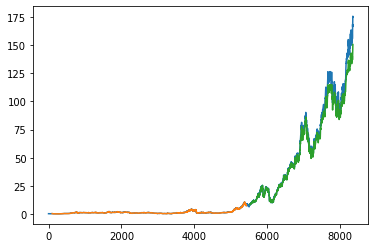

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

2928

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 2587)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.09727756649309449,
 0.09653061483985385,
 0.09098834761122865,
 0.08995059798611571,
 0.09200328955227319,
 0.08924355977999479,
 0.08623864740398093,
 0.08415174431172083,
 0.08780667568368457,
 0.08791501218300954,
 0.09183223192176006,
 0.09544154792558697,
 0.09438669253742273,
 0.09748853757072734,
 0.09525338453202253,
 0.09128484750411806,
 0.0965876340500249,
 0.09816706617176273,
 0.0997921136616374,
 0.1039545160041234,
 0.0985490948799087,
 0.09727186457207739,
 0.09490556734997918,
 0.09850918143278899,
 0.09763108559615494,
 0.09861181601109684,
 0.09887410437788363,
 0.10004299818638998,
 0.09974079637248345,
 0.1015939207030423,
 0.1014627765196489,
 0.10113206510065686,
 0.10394881408310629,
 0.10696513030115436,
 0.11052883093684443,
 0.11024373488598924,
 0.11150956135178634,
 0.11074550393549439,
 0.1128381089487716,
 0.11438903146542392,
 0.11399559891524373,
 0.11276968589656634,
 0.1165728672149748,
 0.12129975973815411,
 0.12125984629103437,
 0.120467279269656

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=2586
i=0
while(i<30):
    
    if(len(temp_input)>2586):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.09653061 0.09098835 0.0899506  ... 1.         0.99794731 0.99464019]
0 day output [[0.8577128]]
1 day input [0.09098835 0.0899506  0.09200329 ... 0.99794731 0.99464019 0.85771281]
1 day output [[0.8175177]]
2 day input [0.0899506  0.09200329 0.08924356 ... 0.99464019 0.85771281 0.8175177 ]
2 day output [[0.763504]]
3 day input [0.09200329 0.08924356 0.08623865 ... 0.85771281 0.8175177  0.76350403]
3 day output [[0.70953614]]
4 day input [0.08924356 0.08623865 0.08415174 ... 0.8175177  0.76350403 0.70953614]
4 day output [[0.6602254]]
5 day input [0.08623865 0.08415174 0.08780668 ... 0.76350403 0.70953614 0.66022539]
5 day output [[0.61696005]]
6 day input [0.08415174 0.08780668 0.08791501 ... 0.70953614 0.66022539 0.61696005]
6 day output [[0.5801429]]
7 day input [0.08780668 0.08791501 0.09183223 ... 0.66022539 0.61696005 0.58014292]
7 day output [[0.5496911]]
8 day input [0.08791501 0.09183223 0.09544155 ... 0.61696005 0.58014292 0.54969108]
8 day output [[0.5251377]]


In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt
len(df1)

8364

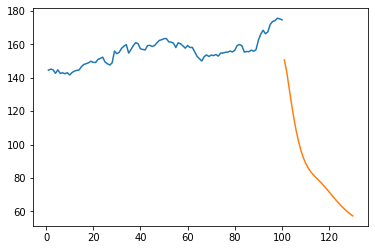

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[8264:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

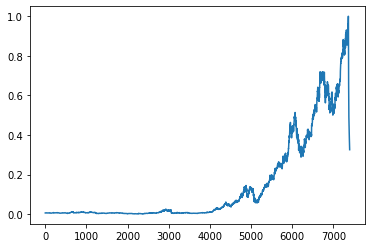

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])

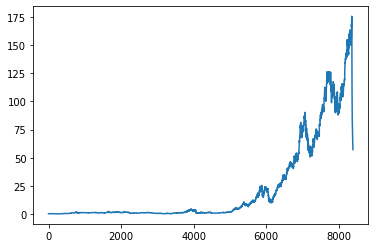

In [ ]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)